In [2]:
import pandas as pd
from xnoapi.vn.data.stocks import Company, Finance
from xnoapi.vn.data import client
import matplotlib.pyplot as plt
from xnoapi.vn.data import get_stock_hist # Cài đặt xnoapi và các thư viện cần thiết

In [3]:
cl = client('hl6Y_dIvBK4QNLYoRjU0ajX1DB_UpedW5uIoFGGss4IdaO3pLTlJe0cUKtbCzj6ZmIIVGzupyccrHD4wsMvQ0M09dCZVILpaevaKeHZCzOP55lypJN8YhIOIzHAO1lMo')

In [4]:
ma_co_phieu = 'VCB' # Lấy mã cổ phiếu cần
company = Company(ma_co_phieu)
finance = Finance(ma_co_phieu)

In [5]:
# Phần 1
overview = company.overview() # Lấy dữ liệu về công ty
# Chuyển sang bảng sử dụng pandas và chỉ lấy một số dữ liệu làm ví dụ
thongtincoban = pd.DataFrame(columns=['tên','mã cổ phiếu','Website','exchange','Ngành','Năm thành lập','Xếp hạng cổ phiếu','Số lượng nhân viên','Số lượng cổ đông'])
thongtincoban['tên'] = overview['shortName']
thongtincoban['mã cổ phiếu'] = overview['ticker']
thongtincoban['exchange'] = overview['exchange']
thongtincoban['Xếp hạng cổ phiếu'] = overview['stockRating']
thongtincoban['Website'] = overview['website']
thongtincoban['Số lượng nhân viên'] = overview['noEmployees']
thongtincoban['Số lượng cổ đông'] = overview['noShareholders']
thongtincoban['Ngành'] = overview['industry']
thongtincoban['Năm thành lập'] = overview['establishedYear']
thongtincoban.index.name = f'Thông tin cơ bản về {ma_co_phieu}'
thongtincoban.transpose()

Thông tin cơ bản về VCB,0
tên,Vietcombank
mã cổ phiếu,VCB
Website,https://vietcombank.com.vn
exchange,HOSE
Ngành,Ngân hàng
Năm thành lập,2008
Xếp hạng cổ phiếu,2.5
Số lượng nhân viên,24099
Số lượng cổ đông,25183


In [6]:
vcb_hist = get_stock_hist('VCB', resolution='h')
vcb_hist['Date'] = pd.to_datetime(vcb_hist['Date'])
vcb_hist = vcb_hist[vcb_hist['Date'].dt.year == 2025]
vcb_hist = vcb_hist.sort_values('Date', ascending=False)
vcb_hist['volume'] = pd.to_numeric(vcb_hist['volume'])
vcb_hist = vcb_hist.loc[vcb_hist['volume']>1000000]
vcb_hist['Close'] = pd.to_numeric(vcb_hist['Close'])
if vcb_hist.empty:
    print("Không tìm thấy thông tin giao dịch")
vcb_hist.head() # Phần 2

,Date,time,Open,High,Low,Close,volume
3926,2025-11-07,14:00:00,59.5,59.6,59.0,59.3,1288000
3916,2025-11-05,14:00:00,60.4,60.8,60.1,60.8,1437900
3915,2025-11-05,13:00:00,60.8,60.9,60.3,60.4,1364400
3911,2025-11-04,14:00:00,59.8,60.4,59.7,60.1,1005200
3910,2025-11-04,13:00:00,59.4,59.9,59.1,59.8,1009400


In [7]:
file_name = 'vcb_hist_2025'
vcb_hist.to_csv(file_name, index=False)
sodongdulieu = len(vcb_hist)
giatb = vcb_hist['Close'].mean()
gia_cao_nhat = vcb_hist['High'].max()
gia_thap_nhat = vcb_hist['Low'].min()
print(f"1. Tổng số dòng dữ liệu: {sodongdulieu}")
print(f"2. Giá Đóng cửa Trung bình: {giatb:.2f}") # Làm tròn 2 chữ số thập phân
print(f"3. Giá Cao nhất tuyệt đối (High): {gia_cao_nhat:.2f}")
print(f"4. Giá Thấp nhất tuyệt đối (Low): {gia_thap_nhat:.2f}") # In ra kết quả phần 2

1. Tổng số dòng dữ liệu: 374
2. Giá Đóng cửa Trung bình: 61.98
3. Giá Cao nhất tuyệt đối (High): 70.60
4. Giá Thấp nhất tuyệt đối (Low): 52.00


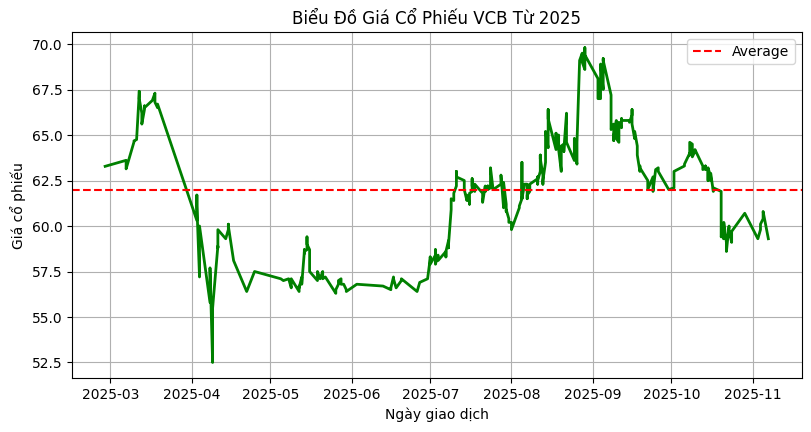

In [8]:
date = vcb_hist['Date']
values = vcb_hist['Close']
plt.figure(figsize=(8,4))
plt.plot(date,values, lw =2, c='g')
plt.tight_layout()
plt.ylabel('Giá cổ phiếu')
plt.xlabel('Ngày giao dịch')
plt.title('Biểu Đồ Giá Cổ Phiếu VCB Từ 2025')
plt.axhline(y=values.mean(), color='red', linestyle='--', label='Average')
plt.legend()
plt.grid(True)
(plt.savefig('bieu_do_vcb.png'))# Phần 3

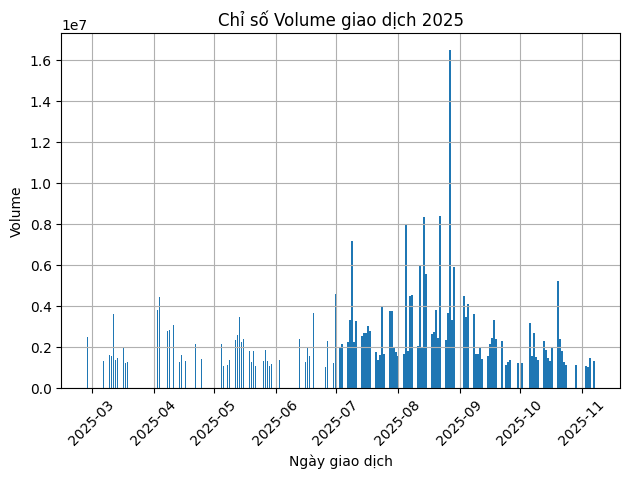

In [9]:
giatri = vcb_hist['volume']
plt.bar(date, giatri)
plt.ylabel('Volume')
plt.xlabel('Ngày giao dịch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Chỉ số Volume giao dịch 2025')
plt.grid()